In [0]:
# Load libraries

import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import precision_recall_fscore_support
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import label_binarize,OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (roc_curve,
                             auc,
                             confusion_matrix,
                             recall_score,
                             roc_auc_score,
                             accuracy_score,
                             balanced_accuracy_score,
                             classification_report,
                             f1_score,
                             precision_recall_fscore_support)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc, plot_roc_curve
import scikitplot as skplt

In [0]:
#!pip install scikit-plot

In [0]:
def results_report(model,x_te,y_te):
    metrics={}
    y_pred = model.predict(x_te)
    metrics['acc']=accuracy_score(y_te,y_pred)
    metrics['recall']=recall_score(y_te,y_pred,average='macro')
    metrics['f_1_score']=f1_score(y_te,y_pred,average='macro')
    classes = list(set(y_te).union(set(y_pred)))
    metrics['roc_auc_score']=roc_auc_score(label_binarize(y_te,classes),label_binarize(y_pred,classes))
    
    #plt.bar(metrics.keys(),metrics.values())
    #plt.show()
    return metrics

In [0]:
resultats={}

In [8]:
#liste des fichiers
os.listdir()

['.config', 'Aggregation.txt', 'flame.txt', 'spiral.txt', 'sample_data']

EXPLORATION DES DONNEES

In [0]:
#lecture du fichier
data=pd.read_csv('spiral.txt', sep='\t', header=None)

In [187]:
data.head()

,0,1,2
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd315391c88>,
      dtype=object)

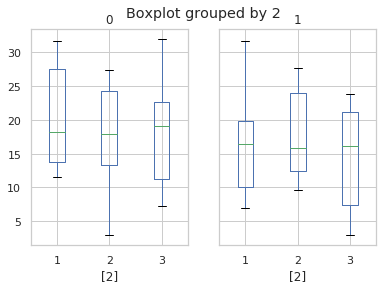

In [188]:
data.boxplot( by=2)

[Text(0.5, 0, 'classe')]

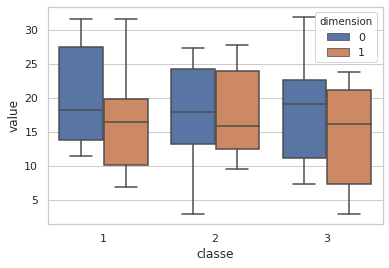

In [189]:
dd=pd.melt(data,id_vars=[2],value_vars=[0,1],var_name='dimension')
ax=sns.boxplot(x=2,y='value',data=dd,hue='dimension')
ax.set(xlabel='classe')

In [190]:
print("nombre de classe %s" % len(set(data[2])))

nombre de classe 3


No handles with labels found to put in legend.


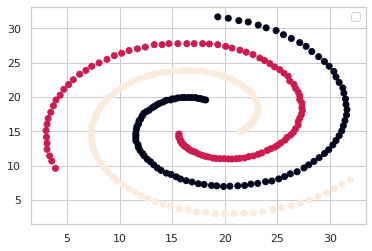

In [191]:
fig, ax = plt.subplots()
plt.scatter(data[0], data[1], c=data[2])
ax.legend()
plt.show()

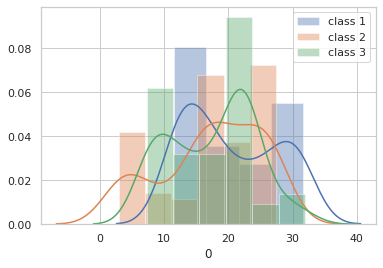

In [192]:
#graph de la premiere dimension en fonction de chaque classe
[sns.distplot(data[0][data[2]==label], label="class {}".format(label)) for label in np.unique(data[2])]
plt.legend();

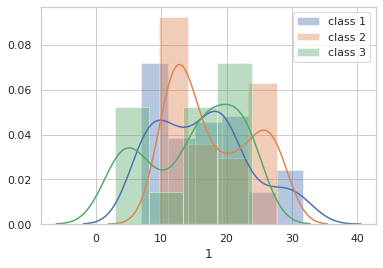

In [193]:
#graphe de la deuxieme dimension en fonction de chaque classe
[sns.distplot(data[1][data[2]==label], label="class {}".format(label)) for label in np.unique(data[2])]
plt.legend();

In [194]:
# Summarize Data

# Load dataset
dataset = data
# Descriptive statistics
# shape
print(dataset.shape)
# types
set_option('display.max_rows', 500)
print("types de chaque variable : \n%s\n" % dataset.dtypes)
# descriptions, change precision to 3 places
set_option('precision', 3)
print(dataset.describe())
# class distribution
print("répartition des effectifs dans chaque classe :\n %s\n" % dataset.groupby(2).size())
# head
set_option('display.width', 100)
print("5 premier éléments")
print(dataset.head())



(312, 3)
types de chaque variable : 
0    float64
1    float64
2      int64
dtype: object

             0        1        2
count  312.000  312.000  312.000
mean    18.408   16.345    2.016
std      7.300    6.867    0.816
min      3.000    2.900    1.000
25%     12.912   11.337    1.000
50%     18.325   16.050    2.000
75%     23.400   21.363    3.000
max     31.950   31.650    3.000
répartition des effectifs dans chaque classe :
 2
1    101
2    105
3    106
dtype: int64

5 premier éléments
       0     1  2
0  31.95  7.95  3
1  31.15  7.30  3
2  30.45  6.65  3
3  29.70  6.00  3
4  28.90  5.55  3


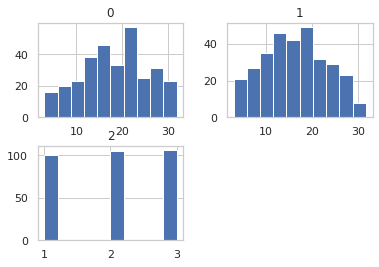

In [195]:
# Data visualizations
# histograms
dataset.hist()
pyplot.show()

In [0]:
## density
#dataset.plot(kind='density', subplots=True, sharex=False, legend=False)
#pyplot.show()
## box and whisker plots
##dataset.plot(kind='box', subplots=True, layout=(8,8), sharex=False, sharey=False)
##pyplot.show()


In [0]:
# scatter plot matrix
#scatter_matrix(dataset)
#pyplot.show()

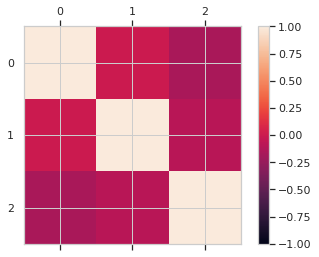

In [197]:

# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset[0:-2].corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

PREPARATION DES DONNEES

In [198]:

# Prepare Data

# Split-out validation dataset
array = dataset.values
X = array[:,0:2].astype(float)
Y = array[:,2]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, stratify=Y)
#
sm = SMOTE(random_state = 2) 
X_train, Y_train = sm.fit_sample(X_train, Y_train.ravel()) 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [199]:
np.bincount(Y_train.astype(int))

array([ 0, 84, 84, 84])

ESTIMATION DES MEILLEURS PARAMETRES POUR CHAUQUE ALGORITHME

In [200]:
# Evaluate Algorithms

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'roc_auc_ovr'

# Spot Check Algorithms
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(probability=True)))
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('SVM_Linear', LinearSVC( )))

results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=num_folds)#, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


KNN: 0.999884 (0.000347)
CART: 0.973802 (0.023870)
NB: 0.578772 (0.059096)
SVM: 0.993069 (0.009074)
LR: 0.586860 (0.077829)
LDA: 0.586860 (0.078591)


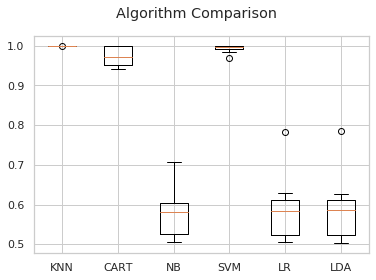

In [201]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()



******  RESULTAT POUR KNN ******

accuracy score : 1.0 

Matrice de confusion : 
[[20  0  0]
 [ 0 21  0]
 [ 0  0 22]] 

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        20
         2.0       1.00      1.00      1.00        21
         3.0       1.00      1.00      1.00        22

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

KNN

******  RESULTAT POUR CART ******

accuracy score : 1.0 

Matrice de confusion : 
[[20  0  0]
 [ 0 21  0]
 [ 0  0 22]] 

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        20
         2.0       1.00      1.00      1.00        21
         3.0       1.00      1.00      1.00        22

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00   

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0

accuracy score : 0.9047619047619048 

Matrice de confusion : 
[[20  0  0]
 [ 1 19  1]
 [ 4  0 18]] 

              precision    recall  f1-score   support

         1.0       0.80      1.00      0.89        20
         2.0       1.00      0.90      0.95        21
         3.0       0.95      0.82      0.88        22

    accuracy                           0.90        63
   macro avg       0.92      0.91      0.91        63
weighted avg       0.92      0.90      0.91        63

SVM

******  RESULTAT POUR LR ******

accuracy score : 0.2222222222222222 

Matrice de confusion : 
[[ 7  3 10]
 [ 5  4 12]
 [12  7  3]] 

              precision    recall  f1-score   support

         1.0       0.29      0.35      0.32        20
         2.0       0.29      0.19      0.23        21
         3.0       0.12      0.14      0.13        22

    accuracy                           0.22        63
   macro avg       0.23      0.23      0.22        63
weighted avg       0.23      0.22      0.22        63

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


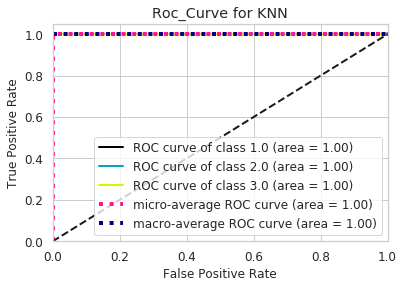

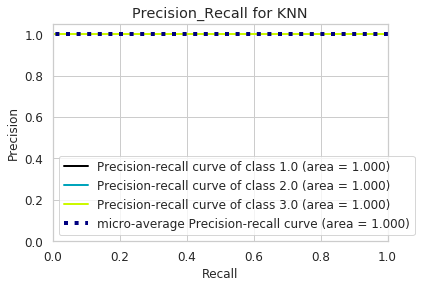

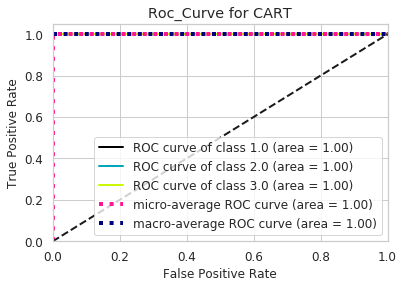

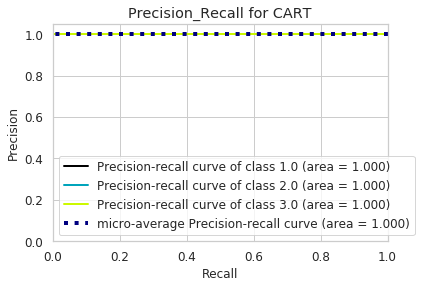

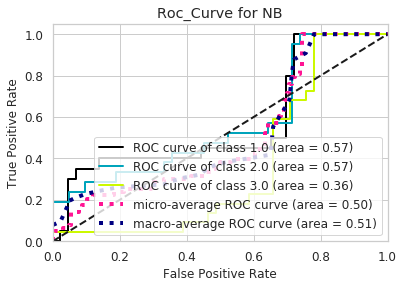

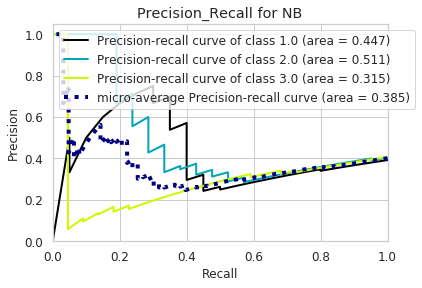

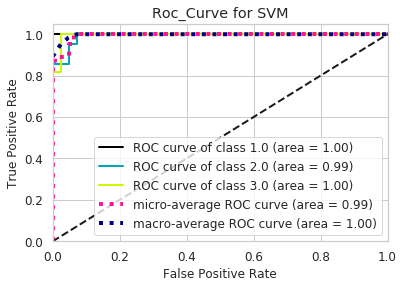

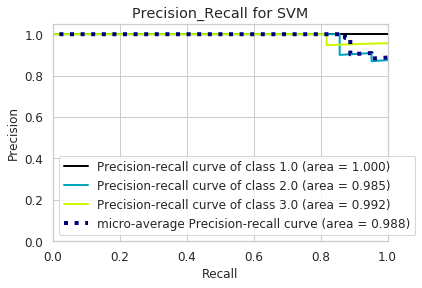

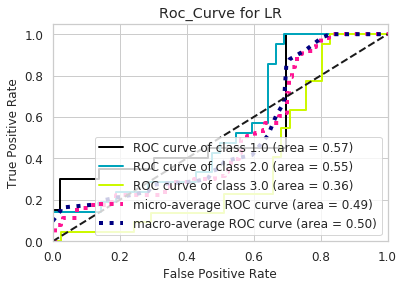

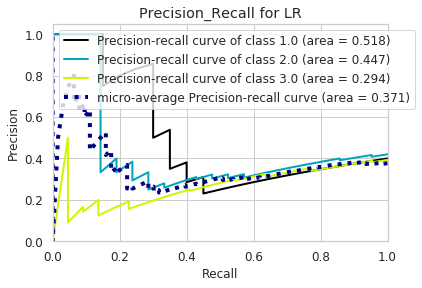

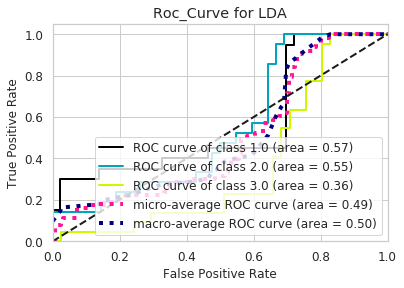

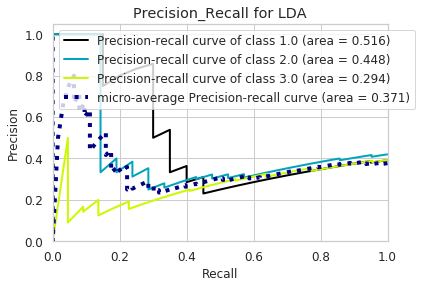

In [202]:
for name, model in models:
  print("\n******  RESULTAT POUR {} ******\n".format(name))
  model.fit(X_train, Y_train)
	#scales_models.append(model)
	#names.append(name)
	#msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  # estimate accuracy on validation dataset
	#print(msg)

  #rescaledValidationX = scaler.transform(X_validation)
  predictions = model.predict(X_validation)#rescaledValidationX)
  print("accuracy score : {} \n".format(accuracy_score(Y_validation, predictions)))
  print("Matrice de confusion : \n{} \n".format(confusion_matrix(Y_validation, predictions)))
  print(classification_report(Y_validation, predictions))
  predict_proba = getattr(model, "predict_proba", None)
  resultats[name]=results_report(model, X_validation, Y_validation)
  if callable(predict_proba):
    print(name)
    y_probas = model.predict_proba(X_validation)
    skplt.metrics.plot_roc(Y_validation, y_probas, title="Roc_Curve for {}".format(name))
    skplt.metrics.plot_precision_recall_curve(Y_validation,y_probas, title="Precision_Recall for {}".format(name))

In [203]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(probability=True))])))
results = []
names = []
for name, model in pipelines:
	kfold = StratifiedKFold(n_splits=num_folds)#, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ScaledLR: 0.587119 (0.078075)
ScaledLDA: 0.586860 (0.078591)
ScaledKNN: 0.999884 (0.000347)
ScaledCART: 0.973509 (0.020282)
ScaledNB: 0.578772 (0.059096)
ScaledSVM: 0.994036 (0.008981)


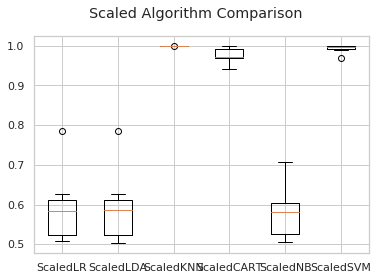

In [204]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()



******  RESULTAT POUR ScaledLR ******

accuracy score : 0.2222222222222222 

Matrice de connfusion : 
[[ 7  3 10]
 [ 5  4 12]
 [12  7  3]] 

              precision    recall  f1-score   support

         1.0       0.29      0.35      0.32        20
         2.0       0.29      0.19      0.23        21
         3.0       0.12      0.14      0.13        22

    accuracy                           0.22        63
   macro avg       0.23      0.23      0.22        63
weighted avg       0.23      0.22      0.22        63

ScaledLR

******  RESULTAT POUR ScaledLDA ******

accuracy score : 0.2222222222222222 

Matrice de connfusion : 
[[ 7  3 10]
 [ 5  4 12]
 [12  7  3]] 

              precision    recall  f1-score   support

         1.0       0.29      0.35      0.32        20
         2.0       0.29      0.19      0.23        21
         3.0       0.12      0.14      0.13        22

    accuracy                           0.22        63
   macro avg       0.23      0.23      0.22        63

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0


******  RESULTAT POUR ScaledCART ******

accuracy score : 1.0 

Matrice de connfusion : 
[[20  0  0]
 [ 0 21  0]
 [ 0  0 22]] 

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        20
         2.0       1.00      1.00      1.00        21
         3.0       1.00      1.00      1.00        22

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

ScaledCART

******  RESULTAT POUR ScaledNB ******

accuracy score : 0.25396825396825395 

Matrice de connfusion : 
[[ 8  4  8]
 [ 6  7  8]
 [11 10  1]] 

              precision    recall  f1-score   support

         1.0       0.32      0.40      0.36        20
         2.0       0.33      0.33      0.33        21
         3.0       0.06      0.05      0.05        22

    accuracy                           0.25        63
   macro avg       0.24      0.26      0.25        63
weighted a

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)



******  RESULTAT POUR ScaledSVM ******

accuracy score : 0.9365079365079365 

Matrice de connfusion : 
[[20  0  0]
 [ 1 20  0]
 [ 3  0 19]] 

              precision    recall  f1-score   support

         1.0       0.83      1.00      0.91        20
         2.0       1.00      0.95      0.98        21
         3.0       1.00      0.86      0.93        22

    accuracy                           0.94        63
   macro avg       0.94      0.94      0.94        63
weighted avg       0.95      0.94      0.94        63

ScaledSVM


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


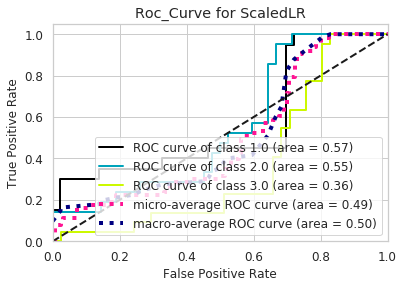

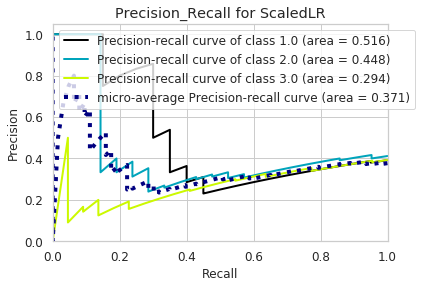

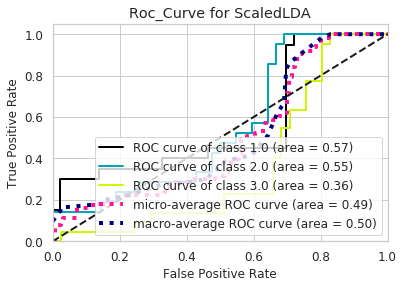

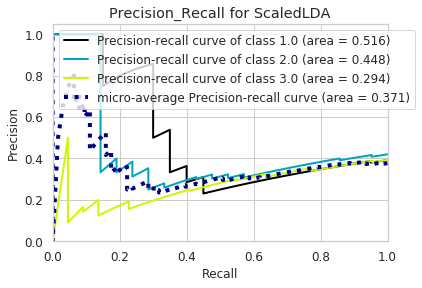

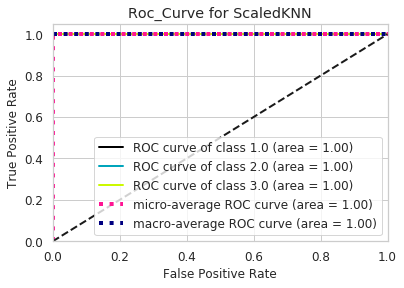

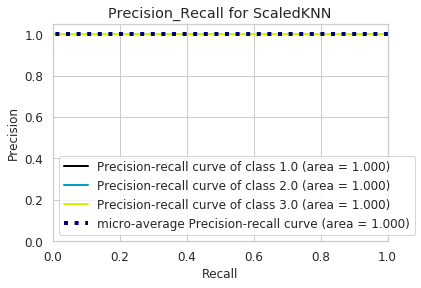

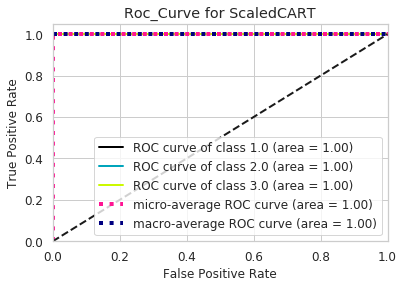

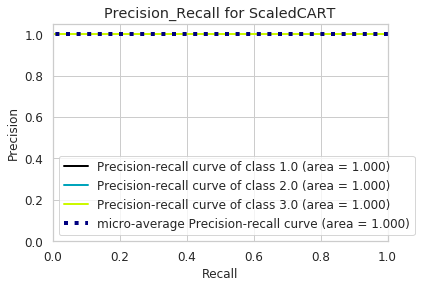

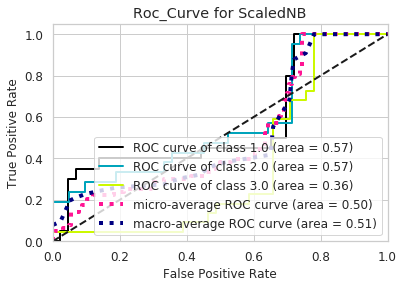

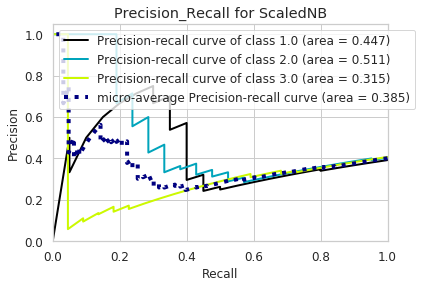

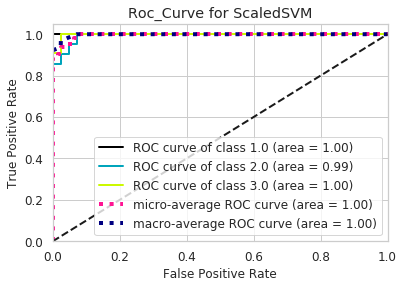

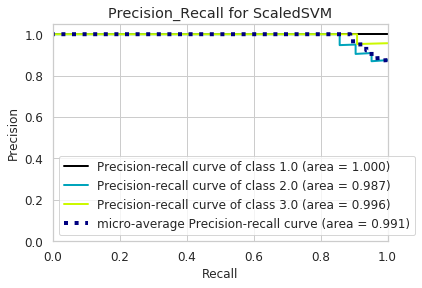

In [205]:
#scales_models=[]
for name, model in pipelines:
  print("\n******  RESULTAT POUR {} ******\n".format(name))
  model.fit(X_train, Y_train)
	#scales_models.append(model)
	#names.append(name)
	#msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  # estimate accuracy on validation dataset
	#print(msg)

  #rescaledValidationX = scaler.transform(X_validation)
  predictions = model.predict(X_validation)#rescaledValidationX)
  print("accuracy score : {} \n".format(accuracy_score(Y_validation, predictions)))
  print("Matrice de connfusion : \n{} \n".format(confusion_matrix(Y_validation, predictions)))
  print(classification_report(Y_validation, predictions))
  predict_proba = getattr(model, "predict_proba", None) 
  resultats[name]=results_report(model, X_validation, Y_validation)
  if callable(predict_proba):
    print(name)
    y_probas = model.predict_proba(X_validation)
    skplt.metrics.plot_roc(Y_validation, y_probas, title="Roc_Curve for {}".format(name))
    skplt.metrics.plot_precision_recall_curve(Y_validation,y_probas, title="Precision_Recall for {}".format(name))

In [206]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = StratifiedKFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: 1.000000 using {'n_neighbors': 1}
1.000000 (0.000000) with: {'n_neighbors': 1}
1.000000 (0.000000) with: {'n_neighbors': 3}
0.999884 (0.000347) with: {'n_neighbors': 5}
0.999537 (0.001061) with: {'n_neighbors': 7}
0.997549 (0.003505) with: {'n_neighbors': 9}
0.995629 (0.006488) with: {'n_neighbors': 11}
0.991462 (0.011533) with: {'n_neighbors': 13}
0.987963 (0.013668) with: {'n_neighbors': 15}
0.978071 (0.022674) with: {'n_neighbors': 17}
0.964461 (0.026348) with: {'n_neighbors': 19}
0.946800 (0.032008) with: {'n_neighbors': 21}


In [207]:
# Finalize Model

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = grid_result.best_estimator_.predict(rescaledValidationX)
print("Best KNN using %s\n" % (grid_result.best_params_))
print("accuracy score : {} \n".format(accuracy_score(Y_validation, predictions)))
print("Matrice de confusion : \n{} \n".format(confusion_matrix(Y_validation, predictions)))
print(classification_report(Y_validation, predictions))

Best KNN using {'n_neighbors': 1}

accuracy score : 1.0 

Matrice de confusion : 
[[20  0  0]
 [ 0 21  0]
 [ 0  0 22]] 

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        20
         2.0       1.00      1.00      1.00        21
         3.0       1.00      1.00      1.00        22

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



In [208]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC(probability=True)
kfold = StratifiedKFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: 0.999047 using {'C': 2.0, 'kernel': 'rbf'}
0.589216 (0.084129) with: {'C': 0.1, 'kernel': 'linear'}
0.644485 (0.083707) with: {'C': 0.1, 'kernel': 'poly'}
0.753227 (0.066583) with: {'C': 0.1, 'kernel': 'rbf'}
0.462881 (0.078087) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.584178 (0.091053) with: {'C': 0.3, 'kernel': 'linear'}
0.642552 (0.086962) with: {'C': 0.3, 'kernel': 'poly'}
0.934722 (0.041620) with: {'C': 0.3, 'kernel': 'rbf'}
0.604248 (0.080576) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.586424 (0.091545) with: {'C': 0.5, 'kernel': 'linear'}
0.644199 (0.086111) with: {'C': 0.5, 'kernel': 'poly'}
0.983510 (0.016641) with: {'C': 0.5, 'kernel': 'rbf'}
0.654071 (0.056692) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.587691 (0.087458) with: {'C': 0.7, 'kernel': 'linear'}
0.642075 (0.074618) with: {'C': 0.7, 'kernel': 'poly'}
0.989992 (0.010974) with: {'C': 0.7, 'kernel': 'rbf'}
0.684491 (0.038928) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.589148 (0.086387) with: {'C': 0.9, 'kernel': 'linear'

In [209]:

# Finalize Model

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = grid_result.best_estimator_.predict(rescaledValidationX)
print("Best SVM using %s\n" % (grid_result.best_params_))
print("accuracy score : {} \n".format(accuracy_score(Y_validation, predictions)))
print("Matrice de confusion : \n{} \n".format(confusion_matrix(Y_validation, predictions)))
print(classification_report(Y_validation, predictions))


Best SVM using {'C': 2.0, 'kernel': 'rbf'}

accuracy score : 1.0 

Matrice de confusion : 
[[20  0  0]
 [ 0 21  0]
 [ 0  0 22]] 

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        20
         2.0       1.00      1.00      1.00        21
         3.0       1.00      1.00      1.00        22

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



In [210]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
	kfold = StratifiedKFold(n_splits=num_folds)#, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

AB: 0.896378 (0.062184)
GBM: 0.990441 (0.019885)
RF: 0.999278 (0.001555)
ET: 1.000000 (0.000000)


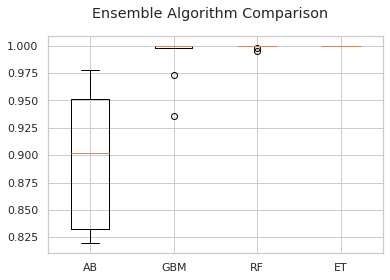

In [211]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


******  RESULTAT POUR AB ******

accuracy score : 0.9682539682539683 

Matrice de connfusion : 
[[19  0  1]
 [ 0 21  0]
 [ 1  0 21]] 

              precision    recall  f1-score   support

         1.0       0.95      0.95      0.95        20
         2.0       1.00      1.00      1.00        21
         3.0       0.95      0.95      0.95        22

    accuracy                           0.97        63
   macro avg       0.97      0.97      0.97        63
weighted avg       0.97      0.97      0.97        63


******  RESULTAT POUR GBM ******



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


accuracy score : 0.9841269841269841 

Matrice de connfusion : 
[[20  0  0]
 [ 0 21  0]
 [ 1  0 21]] 

              precision    recall  f1-score   support

         1.0       0.95      1.00      0.98        20
         2.0       1.00      1.00      1.00        21
         3.0       1.00      0.95      0.98        22

    accuracy                           0.98        63
   macro avg       0.98      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63


******  RESULTAT POUR RF ******



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


accuracy score : 1.0 

Matrice de connfusion : 
[[20  0  0]
 [ 0 21  0]
 [ 0  0 22]] 

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        20
         2.0       1.00      1.00      1.00        21
         3.0       1.00      1.00      1.00        22

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63


******  RESULTAT POUR ET ******



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


accuracy score : 1.0 

Matrice de connfusion : 
[[20  0  0]
 [ 0 21  0]
 [ 0  0 22]] 

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        20
         2.0       1.00      1.00      1.00        21
         3.0       1.00      1.00      1.00        22

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



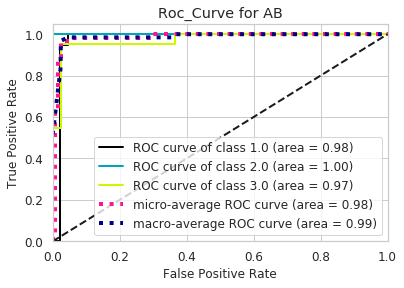

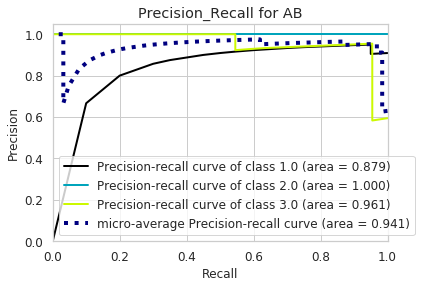

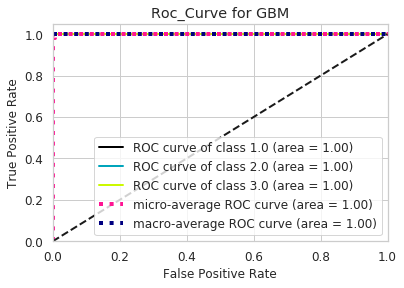

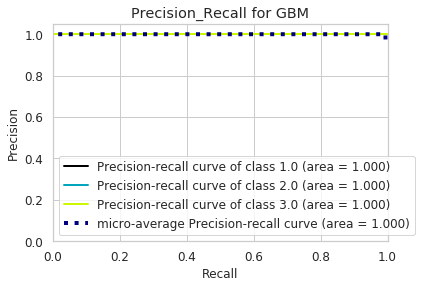

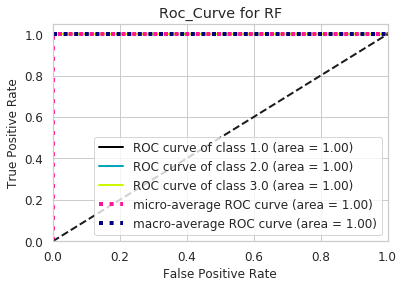

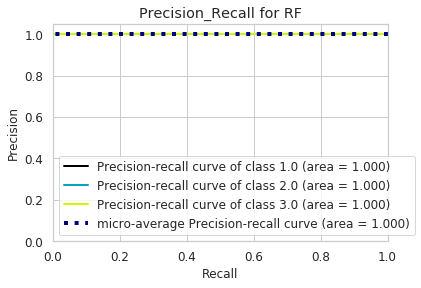

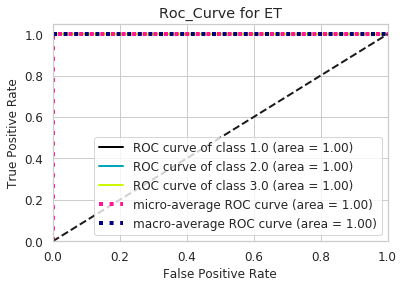

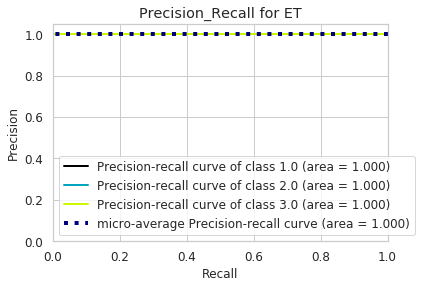

In [212]:
for name, model in ensembles:
  print("\n******  RESULTAT POUR {} ******\n".format(name))
  model.fit(X_train, Y_train)
	#scales_models.append(model)
	#names.append(name)
	#msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  # estimate accuracy on validation dataset
	#print(msg)

  #rescaledValidationX = scaler.transform(X_validation)
  predictions = model.predict(X_validation)#rescaledValidationX)
  print("accuracy score : {} \n".format(accuracy_score(Y_validation, predictions)))
  print("Matrice de connfusion : \n{} \n".format(confusion_matrix(Y_validation, predictions)))
  print(classification_report(Y_validation, predictions))
  predict_proba = getattr(model, "predict_proba", None)
  
  resultats[name]=results_report(model, X_validation, Y_validation)
  if callable(predict_proba):
    y_probas = model.predict_proba(X_validation)
    skplt.metrics.plot_roc(Y_validation, y_probas, title="Roc_Curve for {}".format(name))
    skplt.metrics.plot_precision_recall_curve(Y_validation,y_probas, title="Precision_Recall for {}".format(name))

ESTIMATION DES METRICS POUR CHAQUE ALGORITHME

In [213]:
m = pd.DataFrame.from_dict(resultats).T
m = m.sort_values(by =list(m),ascending=False)
m

,acc,recall,f_1_score,roc_auc_score
KNN,1.000,1.000,1.000,1.000
CART,1.000,1.000,1.000,1.000
ScaledKNN,1.000,1.000,1.000,1.000
ScaledCART,1.000,1.000,1.000,1.000
RF,1.000,1.000,1.000,1.000
ET,1.000,1.000,1.000,1.000
GBM,0.984,0.985,0.984,0.989
AB,0.968,0.968,0.968,0.976
ScaledSVM,0.937,0.939,0.937,0.954
SVM,0.905,0.908,0.906,0.930
